In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import itertools

# Explore hate crime data from Kaggle

In [4]:
kaggle_hate_crimes = pd.read_csv('hate_crimes.csv')

In [5]:
kaggle_hate_crimes.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [6]:
print(kaggle_hate_crimes.dtypes)

state                                        object
median_household_income                       int64
share_unemployed_seasonal                   float64
share_population_in_metro_areas             float64
share_population_with_high_school_degree    float64
share_non_citizen                           float64
share_white_poverty                         float64
gini_index                                  float64
share_non_white                             float64
share_voters_voted_trump                    float64
hate_crimes_per_100k_splc                   float64
avg_hatecrimes_per_100k_fbi                 float64
dtype: object


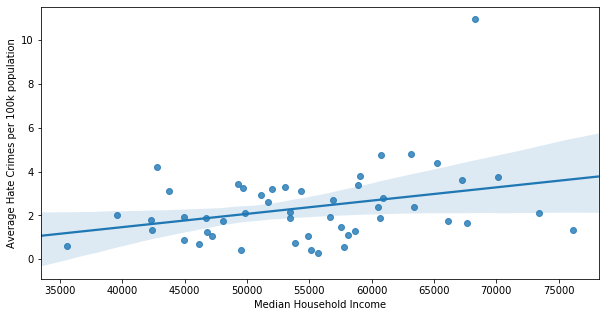

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x = kaggle_hate_crimes['median_household_income'], y = kaggle_hate_crimes['avg_hatecrimes_per_100k_fbi'])
plt.xlabel('Median Household Income')
plt.ylabel('Average Hate Crimes per 100k population')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [10]:
stats.pearsonr(kaggle_hate_crimes['median_household_income'], y = kaggle_hate_crimes['avg_hatecrimes_per_100k_fbi'])**2

ValueError: array must not contain infs or NaNs

In [9]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
r2

<function __main__.r2(x, y)>

In [6]:
kaggle_hate_crimes_pearson = kaggle_hate_crimes.corr(method='pearson')
kaggle_hate_crimes_pearson

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
median_household_income,1.000000,-0.376722,0.286480,0.653490,0.302288,-0.818045,-0.178821,0.103775,-0.597528,0.350714,0.318246
share_unemployed_seasonal,-0.376722,1.000000,0.358113,-0.621168,0.278899,0.209440,0.541659,0.431847,-0.148192,0.083292,0.073936
share_population_in_metro_areas,0.286480,0.358113,1.000000,-0.268846,0.745464,-0.385559,0.515843,0.547672,-0.570695,0.162217,0.209827
share_population_with_high_school_degree,0.653490,-0.621168,-0.268846,1.000000,-0.277009,-0.494008,-0.592052,-0.434846,-0.155656,0.308944,0.164148
share_non_citizen,0.302288,0.278899,0.745464,-0.277009,1.000000,-0.389718,0.480257,0.733655,-0.631194,0.243507,0.300892
share_white_poverty,-0.818045,0.209440,-0.385559,-0.494008,-0.389718,1.000000,0.032584,-0.269449,0.552849,-0.286170,-0.260094
gini_index,-0.178821,0.541659,0.515843,-0.592052,0.480257,0.032584,1.000000,0.468467,-0.411543,0.329439,0.421272
share_non_white,0.103775,0.431847,0.547672,-0.434846,0.733655,-0.269449,0.468467,1.000000,-0.488838,0.047561,0.083525
share_voters_voted_trump,-0.597528,-0.148192,-0.570695,-0.155656,-0.631194,0.552849,-0.411543,-0.488838,1.000000,-0.657067,-0.504532
hate_crimes_per_100k_splc,0.350714,0.083292,0.162217,0.308944,0.243507,-0.286170,0.329439,0.047561,-0.657067,1.000000,0.758700


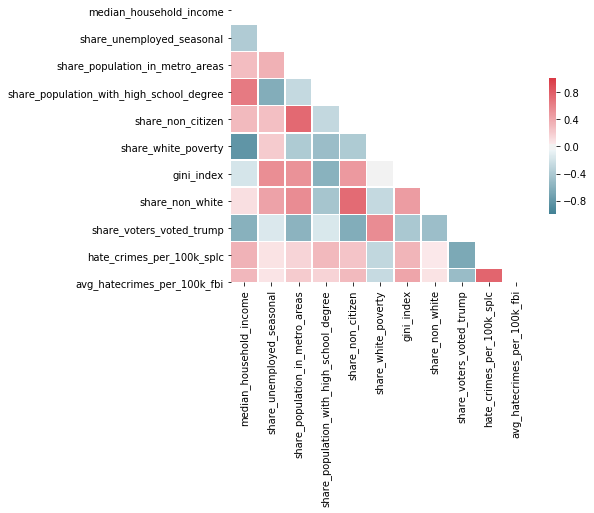

In [7]:
#this masks the upper triangle of the heatmap
mask = np.zeros_like(kaggle_hate_crimes_pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#this sets up the figure
f, ax = plt.subplots(figsize=(7, 5))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(kaggle_hate_crimes_pearson, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Gini Coefficient Data

In [8]:
gini_2013 = pd.read_csv('gini_2013.csv')
gini_2014 = pd.read_csv('gini_2014.csv')
gini_2015 = pd.read_csv('gini_2015.csv')
gini_2016 = pd.read_csv('gini_2016.csv')
gini_2017 = pd.read_csv('gini_2017.csv')

In [9]:
gini_2013

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01
0,Id,Id2,Geography,Estimate; Gini Index,Margin of Error; Gini Index
1,0400000US01,01,Alabama,0.4729,0.0018
2,0400000US02,02,Alaska,0.4143,0.0039
3,0400000US04,04,Arizona,0.4585,0.0019
4,0400000US05,05,Arkansas,0.4646,0.0031
5,0400000US06,06,California,0.4782,0.0007
6,0400000US08,08,Colorado,0.4568,0.0019
7,0400000US09,09,Connecticut,0.4874,0.0021
8,0400000US10,10,Delaware,0.4410,0.0037
9,0400000US11,11,District of Columbia,0.5303,0.0048


In [10]:
gini_2013.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

In [11]:
gini_2014.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

In [12]:
gini_2015.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

In [13]:
gini_2016.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

In [14]:
gini_2017.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

In [15]:
gini_2013_clean = gini_2013.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})
gini_2014_clean = gini_2014.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})
gini_2015_clean = gini_2015.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})
gini_2016_clean = gini_2016.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})
gini_2017_clean = gini_2017.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})

In [16]:
gini_2017_clean

,State,Gini_Index_Est
0,Geography,Estimate; Gini Index
1,Alabama,0.4776
2,Alaska,0.4180
3,Arizona,0.4690
4,Arkansas,0.4732
5,California,0.4889
6,Colorado,0.4589
7,Connecticut,0.4950
8,Delaware,0.4570
9,District of Columbia,0.5314


In [17]:
gini_2013_reindex = gini_2013_clean.drop([0,52])

In [18]:
gini_2013_reindex.reset_index(drop=True)

,State,Gini_Index_Est
0,Alabama,0.4729
1,Alaska,0.4143
2,Arizona,0.4585
3,Arkansas,0.4646
4,California,0.4782
5,Colorado,0.4568
6,Connecticut,0.4874
7,Delaware,0.4410
8,District of Columbia,0.5303
9,Florida,0.4782


In [19]:
gini_2013_reindex

,State,Gini_Index_Est
1,Alabama,0.4729
2,Alaska,0.4143
3,Arizona,0.4585
4,Arkansas,0.4646
5,California,0.4782
6,Colorado,0.4568
7,Connecticut,0.4874
8,Delaware,0.4410
9,District of Columbia,0.5303
10,Florida,0.4782


In [20]:
gini_2014_reindex = gini_2014_clean.drop([0,52])

In [21]:
gini_2014_reindex = gini_2014_reindex.reset_index(drop=True)

In [22]:
gini_2014_reindex

,State,Gini_Index_Est
0,Alabama,0.4740
1,Alaska,0.4146
2,Arizona,0.4614
3,Arkansas,0.4661
4,California,0.4823
5,Colorado,0.4584
6,Connecticut,0.4919
7,Delaware,0.4433
8,District of Columbia,0.5295
9,Florida,0.4812


In [23]:
gini_2015_reindex = gini_2015_clean.drop([0,52])

In [24]:
gini_2015_reindex = gini_2015_reindex.reset_index(drop=True)

In [25]:
gini_2015_reindex

,State,Gini_Index_Est
0,Alabama,0.4753
1,Alaska,0.4181
2,Arizona,0.4651
3,Arkansas,0.4702
4,California,0.4858
5,Colorado,0.4592
6,Connecticut,0.4930
7,Delaware,0.4462
8,District of Columbia,0.5317
9,Florida,0.4843


In [26]:
gini_2016_reindex = gini_2016_clean.drop([0,52])

In [27]:
gini_2016_reindex = gini_2016_reindex.reset_index(drop=True)

In [28]:
gini_2016_reindex

,State,Gini_Index_Est
0,Alabama,0.4769
1,Alaska,0.4174
2,Arizona,0.4682
3,Arkansas,0.4708
4,California,0.4880
5,Colorado,0.4590
6,Connecticut,0.4947
7,Delaware,0.4488
8,District of Columbia,0.5334
9,Florida,0.4852


In [29]:
gini_2017_reindex = gini_2017_clean.drop([0,52])

In [30]:
gini_2017_reindex = gini_2017_reindex.reset_index(drop=True)

In [31]:
gini_2017_reindex

,State,Gini_Index_Est
0,Alabama,0.4776
1,Alaska,0.4180
2,Arizona,0.4690
3,Arkansas,0.4732
4,California,0.4889
5,Colorado,0.4589
6,Connecticut,0.4950
7,Delaware,0.4570
8,District of Columbia,0.5314
9,Florida,0.4858


In [32]:
left = gini_2013_reindex
right = gini_2014_reindex
df_merge1 = left.merge(right, on=('State'), suffixes=('_2013', '_2014'))

In [33]:
left = df_merge1
right = gini_2015_reindex
# df_merge2 = left.set_index('State').join(right.set_index('State'))
df_merge2 = left.join(right, rsuffix='_2015')

In [34]:
df_merge2 = df_merge2.rename(columns = {'Gini_Index_Est': 'Gini_Index_Est_2015'})

In [35]:
left = df_merge2
right = gini_2016_reindex
df_merge3 = left.join(right, rsuffix='_2016')

In [36]:
df_merge3 = df_merge3.rename(columns = {'Gini_Index_Est': 'Gini_Index_Est_2016'})

In [37]:
left = df_merge3
right = gini_2017_reindex
df_merge4 = left.join(right, rsuffix='_2017')

In [38]:
df_merge4 = df_merge4.rename(columns = {'Gini_Index_Est': 'Gini_Index_Est_2017'})

In [39]:
df_merge4

,State,Gini_Index_Est_2013,Gini_Index_Est_2014,State_2015,Gini_Index_Est_2015,State_2016,Gini_Index_Est_2016,State_2017,Gini_Index_Est_2017
0,Alabama,0.4729,0.4740,Alabama,0.4753,Alabama,0.4769,Alabama,0.4776
1,Alaska,0.4143,0.4146,Alaska,0.4181,Alaska,0.4174,Alaska,0.4180
2,Arizona,0.4585,0.4614,Arizona,0.4651,Arizona,0.4682,Arizona,0.4690
3,Arkansas,0.4646,0.4661,Arkansas,0.4702,Arkansas,0.4708,Arkansas,0.4732
4,California,0.4782,0.4823,California,0.4858,California,0.4880,California,0.4889
5,Colorado,0.4568,0.4584,Colorado,0.4592,Colorado,0.4590,Colorado,0.4589
6,Connecticut,0.4874,0.4919,Connecticut,0.4930,Connecticut,0.4947,Connecticut,0.4950
7,Delaware,0.4410,0.4433,Delaware,0.4462,Delaware,0.4488,Delaware,0.4570
8,District of Columbia,0.5303,0.5295,District of Columbia,0.5317,District of Columbia,0.5334,District of Columbia,0.5314
9,Florida,0.4782,0.4812,Florida,0.4843,Florida,0.4852,Florida,0.4858


In [40]:
gini_by_state = df_merge4.drop(['State_2015', 'State_2016', 'State_2017'], axis=1)

In [41]:
gini_by_state.to_csv('gini_by_state.csv')

# Gini exploration

In [42]:
gini_by_state = pd.read_csv('gini_by_state.csv')

In [43]:
gini = gini_by_state.drop(['Unnamed: 0'], axis=1)

In [44]:
gini

,State,Gini_Index_Est_2013,Gini_Index_Est_2014,Gini_Index_Est_2015,Gini_Index_Est_2016,Gini_Index_Est_2017
0,Alabama,0.4729,0.4740,0.4753,0.4769,0.4776
1,Alaska,0.4143,0.4146,0.4181,0.4174,0.4180
2,Arizona,0.4585,0.4614,0.4651,0.4682,0.4690
3,Arkansas,0.4646,0.4661,0.4702,0.4708,0.4732
4,California,0.4782,0.4823,0.4858,0.4880,0.4889
5,Colorado,0.4568,0.4584,0.4592,0.4590,0.4589
6,Connecticut,0.4874,0.4919,0.4930,0.4947,0.4950
7,Delaware,0.4410,0.4433,0.4462,0.4488,0.4570
8,District of Columbia,0.5303,0.5295,0.5317,0.5334,0.5314
9,Florida,0.4782,0.4812,0.4843,0.4852,0.4858


In [45]:
gini['mean'] = gini.mean(axis = 1)

In [46]:
gini

,State,Gini_Index_Est_2013,Gini_Index_Est_2014,Gini_Index_Est_2015,Gini_Index_Est_2016,Gini_Index_Est_2017,mean
0,Alabama,0.4729,0.4740,0.4753,0.4769,0.4776,0.47534
1,Alaska,0.4143,0.4146,0.4181,0.4174,0.4180,0.41648
2,Arizona,0.4585,0.4614,0.4651,0.4682,0.4690,0.46444
3,Arkansas,0.4646,0.4661,0.4702,0.4708,0.4732,0.46898
4,California,0.4782,0.4823,0.4858,0.4880,0.4889,0.48464
5,Colorado,0.4568,0.4584,0.4592,0.4590,0.4589,0.45846
6,Connecticut,0.4874,0.4919,0.4930,0.4947,0.4950,0.49240
7,Delaware,0.4410,0.4433,0.4462,0.4488,0.4570,0.44726
8,District of Columbia,0.5303,0.5295,0.5317,0.5334,0.5314,0.53126
9,Florida,0.4782,0.4812,0.4843,0.4852,0.4858,0.48294


In [47]:
gini.to_csv('gini_with_mean.csv')


In [48]:
gini

,State,Gini_Index_Est_2013,Gini_Index_Est_2014,Gini_Index_Est_2015,Gini_Index_Est_2016,Gini_Index_Est_2017,mean
0,Alabama,0.4729,0.4740,0.4753,0.4769,0.4776,0.47534
1,Alaska,0.4143,0.4146,0.4181,0.4174,0.4180,0.41648
2,Arizona,0.4585,0.4614,0.4651,0.4682,0.4690,0.46444
3,Arkansas,0.4646,0.4661,0.4702,0.4708,0.4732,0.46898
4,California,0.4782,0.4823,0.4858,0.4880,0.4889,0.48464
5,Colorado,0.4568,0.4584,0.4592,0.4590,0.4589,0.45846
6,Connecticut,0.4874,0.4919,0.4930,0.4947,0.4950,0.49240
7,Delaware,0.4410,0.4433,0.4462,0.4488,0.4570,0.44726
8,District of Columbia,0.5303,0.5295,0.5317,0.5334,0.5314,0.53126
9,Florida,0.4782,0.4812,0.4843,0.4852,0.4858,0.48294


In [49]:
gini_pearson = gini.corr(method='pearson')
gini_pearson
#highly correlated

,Gini_Index_Est_2013,Gini_Index_Est_2014,Gini_Index_Est_2015,Gini_Index_Est_2016,Gini_Index_Est_2017,mean
Gini_Index_Est_2013,1.000000,0.997413,0.994858,0.991215,0.986550,0.996265
Gini_Index_Est_2014,0.997413,1.000000,0.998268,0.995512,0.991195,0.998730
Gini_Index_Est_2015,0.994858,0.998268,1.000000,0.997605,0.993797,0.999149
Gini_Index_Est_2016,0.991215,0.995512,0.997605,1.000000,0.997659,0.998620
Gini_Index_Est_2017,0.986550,0.991195,0.993797,0.997659,1.000000,0.996037
mean,0.996265,0.998730,0.999149,0.998620,0.996037,1.000000


In [50]:
median_income = pd.read_csv('median_income13_17.csv')

In [51]:
median_income

,Unnamed: 0,Estimate; INCOME IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars)
0,0,54045,53764,57160,59764,61512
1,1,85385,82307,86376,88604,86831
2,2,57163,59700,61042,63877,67886
3,3,50415,51528,52449,55484,57421
4,4,68222,71015,73581,77359,82009
5,5,72043,75405,78384,80761,84918
6,6,85563,88819,91388,94449,93870
7,7,69394,72594,74931,74251,77082
8,8,72337,84094,94846,98498,106528
9,9,55774,57212,59339,61289,64003


In [52]:
median_income = median_income.drop(['Unnamed: 0'], axis=1)

In [53]:
median_income

,Estimate; INCOME IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars)
0,54045,53764,57160,59764,61512
1,85385,82307,86376,88604,86831
2,57163,59700,61042,63877,67886
3,50415,51528,52449,55484,57421
4,68222,71015,73581,77359,82009
5,72043,75405,78384,80761,84918
6,85563,88819,91388,94449,93870
7,69394,72594,74931,74251,77082
8,72337,84094,94846,98498,106528
9,55774,57212,59339,61289,64003


In [54]:
median_income['mean'] = median_income.mean(axis = 1)

In [55]:
median_income

,Estimate; INCOME IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),mean
0,54045,53764,57160,59764,61512,57249.0
1,85385,82307,86376,88604,86831,85900.6
2,57163,59700,61042,63877,67886,61933.6
3,50415,51528,52449,55484,57421,53459.4
4,68222,71015,73581,77359,82009,74437.2
5,72043,75405,78384,80761,84918,78302.2
6,85563,88819,91388,94449,93870,90817.8
7,69394,72594,74931,74251,77082,73650.4
8,72337,84094,94846,98498,106528,91260.6
9,55774,57212,59339,61289,64003,59523.4


In [56]:
median_income.to_csv('median_with_mean.csv')

In [57]:
median_income_pearson = median_income.corr(method='pearson')
median_income_pearson

,Estimate; INCOME IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),mean
Estimate; INCOME IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),1.000000,0.982191,0.969285,0.961521,0.935318,0.977469
Estimate; INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),0.982191,1.000000,0.989258,0.987093,0.972033,0.995185
Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),0.969285,0.989258,1.000000,0.992308,0.981269,0.996110
Estimate; INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),0.961521,0.987093,0.992308,1.000000,0.991157,0.996491
Estimate; INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),0.935318,0.972033,0.981269,0.991157,1.000000,0.986645
mean,0.977469,0.995185,0.996110,0.996491,0.986645,1.000000


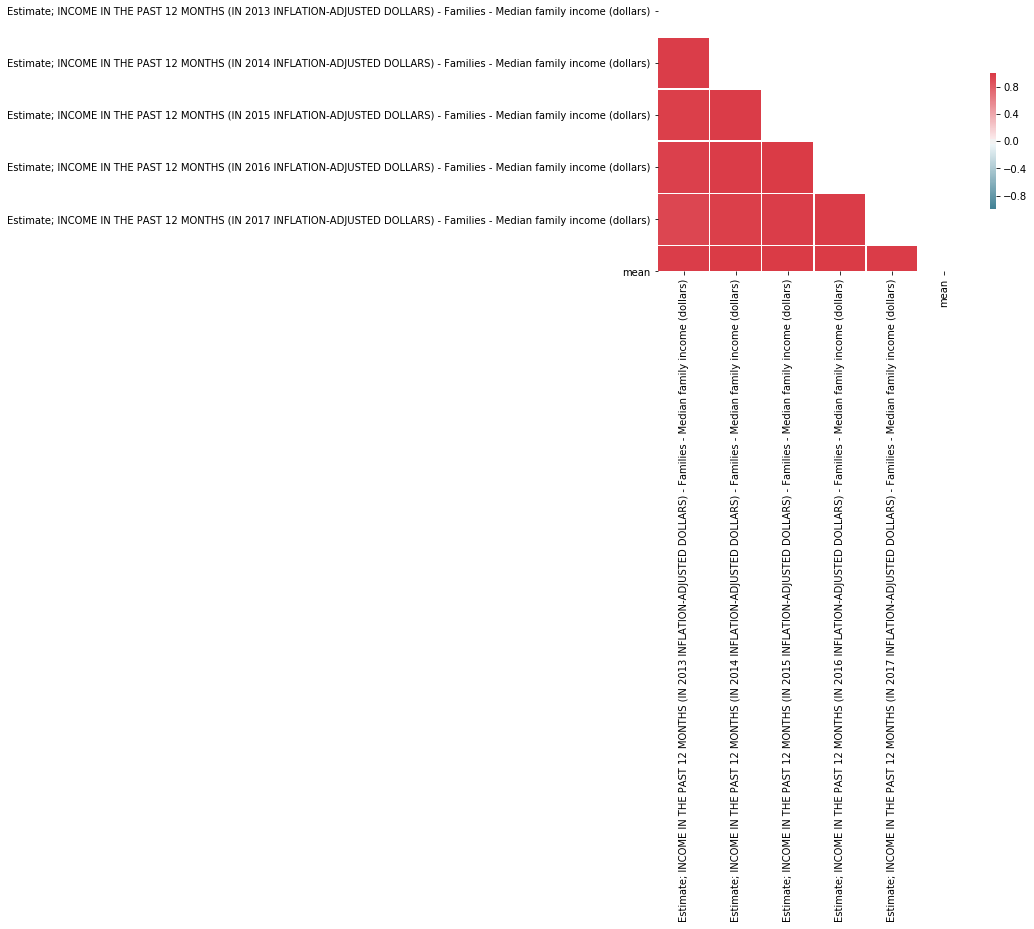

In [58]:
#this masks the upper triangle of the heatmap
mask = np.zeros_like(median_income_pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#this sets up the figure
f, ax = plt.subplots(figsize=(7, 5))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(median_income_pearson, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})